### Import Libraries 

In [1]:
# Import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key

quandl.ApiConfig.api_key= 'bJfYdAHGa6-YMwm5EAox'

###  Find a data and Import

In [3]:
# Import data Bombay

data = quandl.get('FRED/NROUST')

In [4]:
data.head(10)

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182
1950-04-01,5.287866
1950-07-01,5.294604
1950-10-01,5.301367
1951-01-01,5.308113


In [5]:
data.shape

(332, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

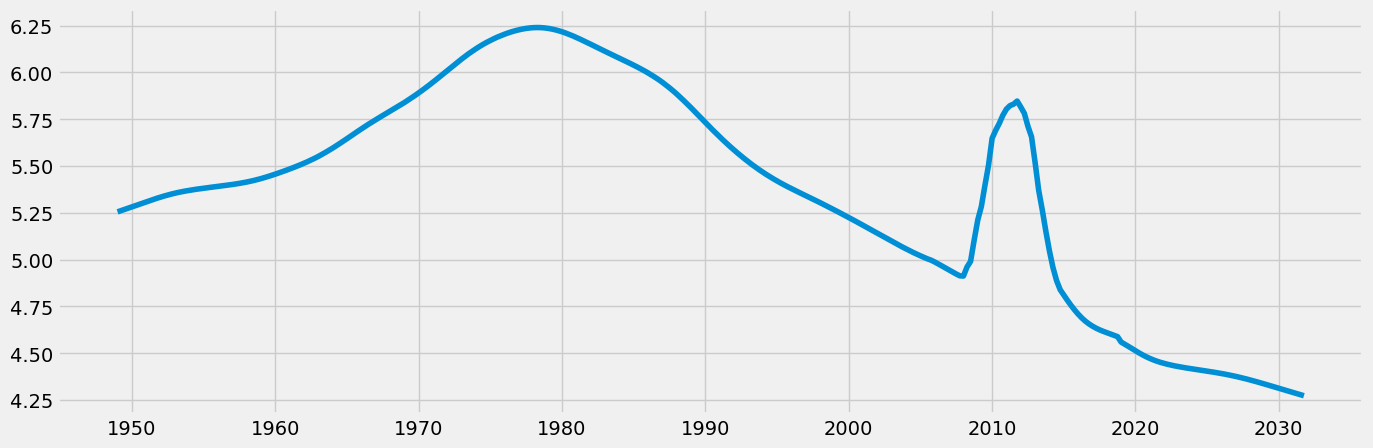

In [8]:
# plot the data 

plt.figure(figsize=(15,5), dpi=100) # # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### Subsetting 


In [9]:
# Reset index so that to use the Data column as a filter 

data_2 = data.reset_index()

In [10]:
data_2.head()

,Date,Value
0,1949-01-01,5.255053
1,1949-04-01,5.261516
2,1949-07-01,5.268013
3,1949-10-01,5.274564
4,1950-01-01,5.281182


In [11]:
# Subset 
data_sub = data_2.loc[(data_2['Date'] >= '1970-01-01') & (data_2['Date'] < '2020-01-01')]

In [12]:
data_sub.shape

(200, 2)

In [13]:
data_sub.head()

,Date,Value
84,1970-01-01,5.890298
85,1970-04-01,5.904100
86,1970-07-01,5.918292
87,1970-10-01,5.932861
88,1971-01-01,5.947782


In [14]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from Date
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the Date column.
data_sub.head()

,Value
datetime,
1970-01-01,5.890298
1970-04-01,5.904100
1970-07-01,5.918292
1970-10-01,5.932861
1971-01-01,5.947782


### Plot the data 

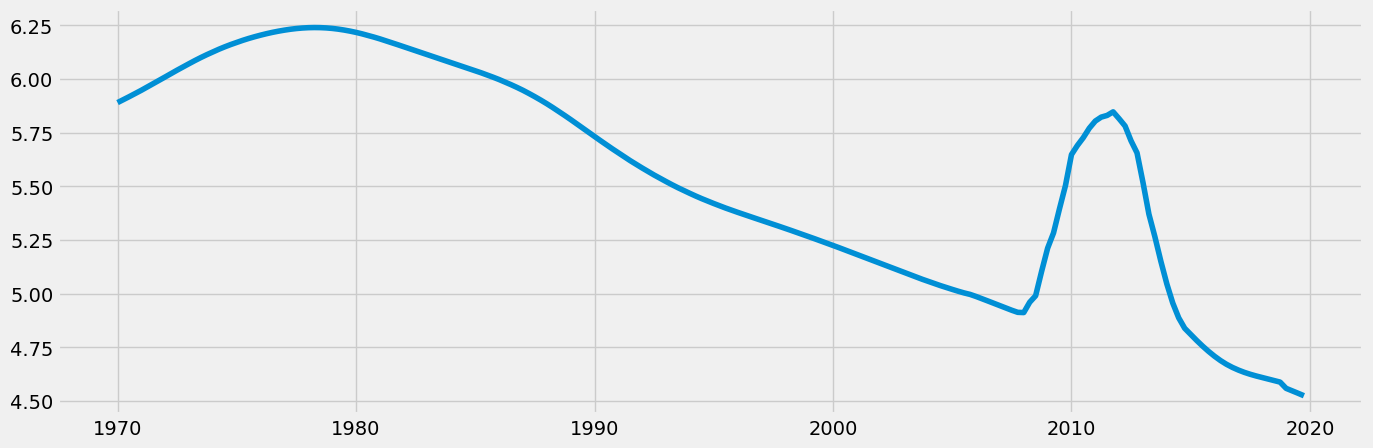

In [15]:
# plot the new subset

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

### Wrangling and cleaning

In [16]:
# Check for missing values 

data_sub.isnull().sum()

Value    0
dtype: int64

In [17]:
dups = data_sub.duplicated()
dups.sum()

0

### Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')


In [19]:
from pylab import rcParams # This will define a fixed size for all special charts

rcParams['figure.figsize'] = 18, 7

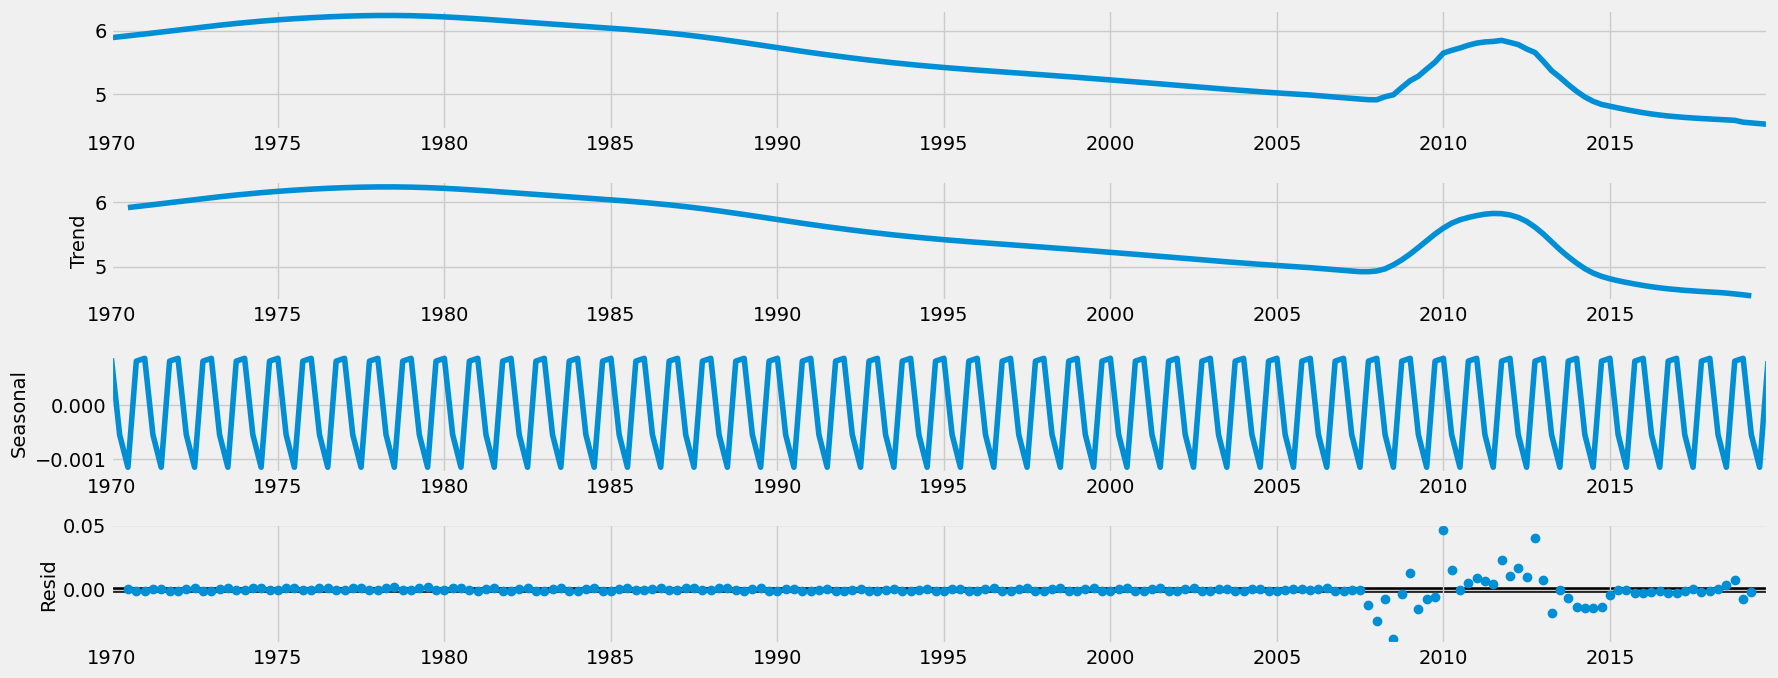

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

### observation :
 the level ans trends are the same in both. there is a slight slope after 1980 upto 2008. after that it shows a fluctuation of upward and then downward trend. there is a seasonal fluctuations which is shown a sopikey curve. 

###  Check for stationarity- a Dickey-Fuller test

In [21]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
        print (result)
        
# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])
    
    

Dickey-Fuller Stationarity test:
Test Statistic                  -0.274537
p-value                          0.929034
Number of Lags Used             15.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
dtype: float64
Test Statistic                  -0.274537
p-value                          0.929034
Number of Lags Used             15.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
dtype: float64
Test Statistic                  -0.274537
p-value                          0.929034
Number of Lags Used             15.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


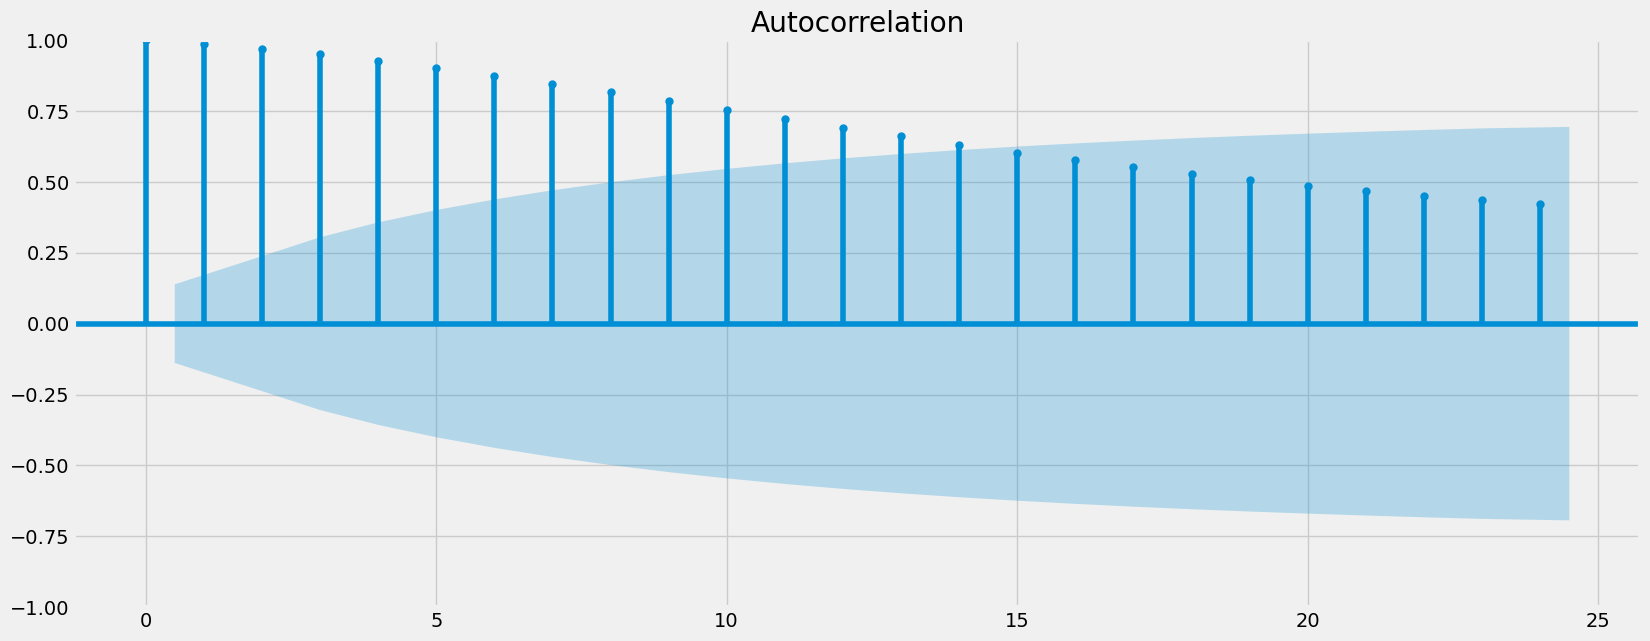

In [22]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots


plot_acf(data_sub)
plt.show()

#### Observation : Data is not stationary, performing another round of differencing to make data Stationary

###  Stationarizing 

In [23]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [24]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [25]:
data_diff.head()

,Value
datetime,
1970-04-01,0.013802
1970-07-01,0.014192
1970-10-01,0.014569
1971-01-01,0.014921
1971-04-01,0.015234


In [26]:
data_diff.columns

Index(['Value'], dtype='object')

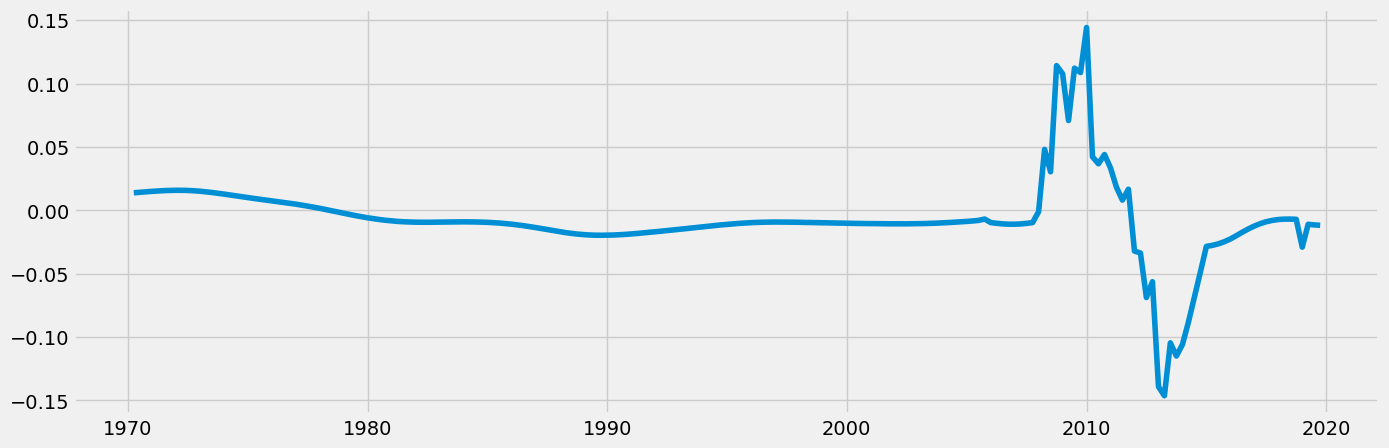

In [27]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)


In [28]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.957622
p-value                          0.039046
Number of Lags Used             15.000000
Number of Observations Used    183.000000
Critical Value (1%)             -3.466598
dtype: float64
Test Statistic                  -2.957622
p-value                          0.039046
Number of Lags Used             15.000000
Number of Observations Used    183.000000
Critical Value (1%)             -3.466598
Critical Value (5%)             -2.877467
dtype: float64
Test Statistic                  -2.957622
p-value                          0.039046
Number of Lags Used             15.000000
Number of Observations Used    183.000000
Critical Value (1%)             -3.466598
Critical Value (5%)             -2.877467
Critical Value (10%)            -2.575260
dtype: float64


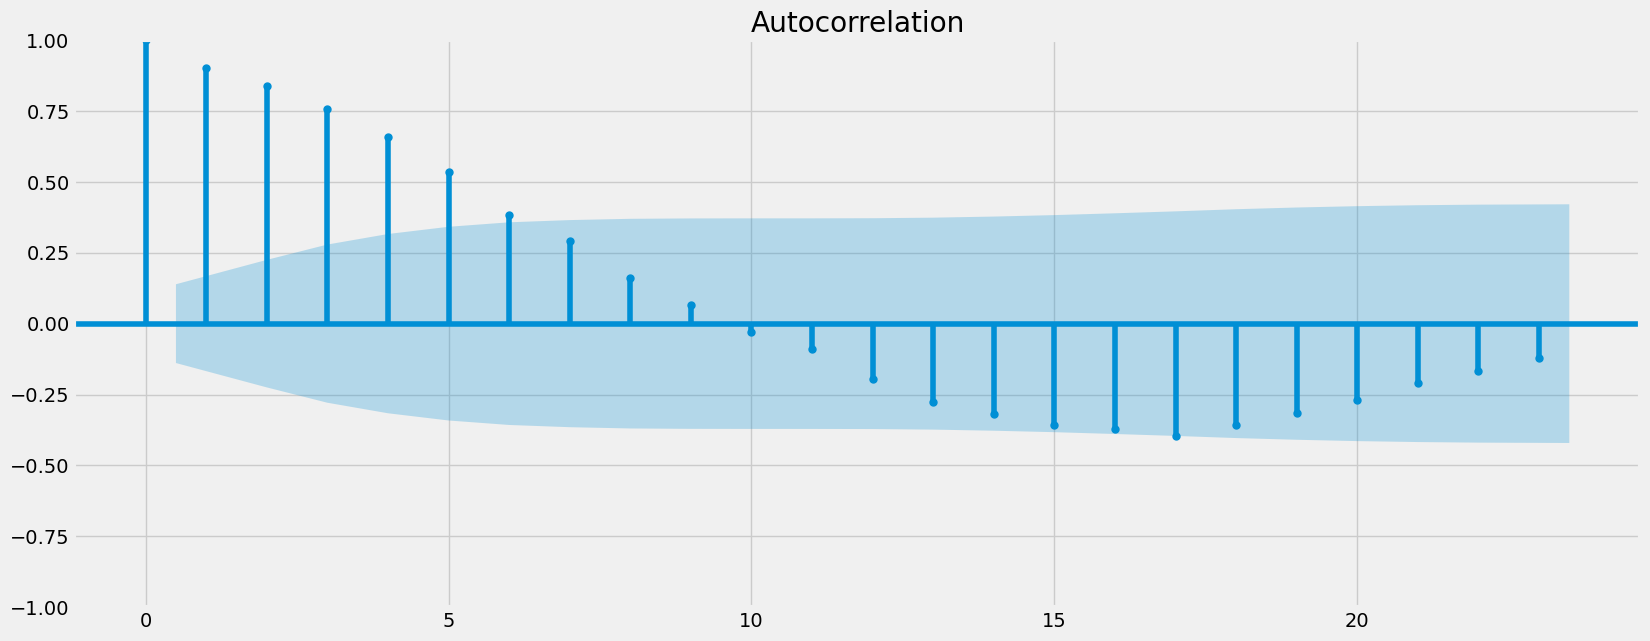

In [29]:
plot_acf(data_diff)

plt.show()

#### Observation: The test says the data is stationary. 